<a href="https://colab.research.google.com/github/SibelCakmak/gender_determination_by_height_and_weight/blob/main/gender_determination_by_height_and_weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**Drive Bağlantısı Ve Zip den Çıkarma İşlemleri**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip archive.zip -d /content/drive/MyDrive/datasets/archive.zip

unzip:  cannot find or open archive.zip, archive.zip.zip or archive.zip.ZIP.


In [4]:
!unzip -u "/content/drive/MyDrive/datasets/archive.zip" -d "/content/drive/MyDrive"


Archive:  /content/drive/MyDrive/datasets/archive.zip


In [5]:
!unzip "/content/drive/MyDrive/datasets/archive.zip" -d "/content"

Archive:  /content/drive/MyDrive/datasets/archive.zip
  inflating: /content/Test set.csv   
  inflating: /content/Training set.csv  


**Veri Okuma İşlemleri**

In [6]:
trainset = pd.read_csv('/content/Training set.csv')
trainset.head(10)

,Height,Weight,Sex
0,165.65,35.41,Female
1,148.53,74.45,Female
2,167.04,81.22,Male
3,161.54,71.47,Male
4,174.31,78.18,Male
5,143.05,79.27,Female
6,149.16,63.71,Female
7,155.80,86.01,Female
8,145.37,88.33,Female
9,162.56,87.36,Male


In [7]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3000 non-null   float64
 1   Weight  3000 non-null   float64
 2   Sex     3000 non-null   object 
dtypes: float64(2), object(1)
memory usage: 70.4+ KB


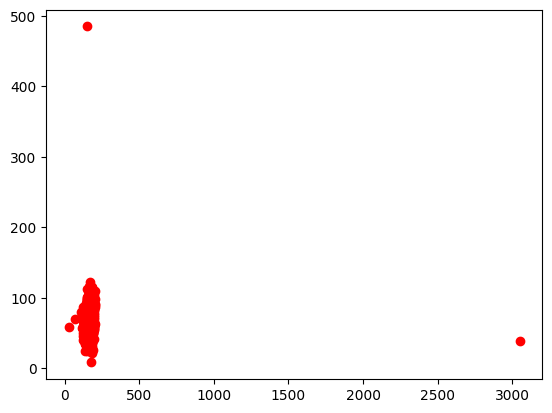

In [8]:
plt.scatter(trainset.Height,trainset.Weight,marker="o",color='red')

In [9]:
x = trainset[['Weight','Height']]
y = trainset['Sex']

In [10]:
y

0       Female
1       Female
2         Male
3         Male
4         Male
         ...  
2995    Female
2996    Female
2997    Female
2998    Female
2999      Male
Name: Sex, Length: 3000, dtype: object

**train_test_split** işlevi, bir veri kümesini eğitim verileri ve test verileri olarak ayırır.
[Detaylı Bilgi](https://www.sharpsightlabs.com/blog/scikit-train_test_split/)

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

# Eğitim Aşamaları

**KNN algoritması**, çoğunluk sınıf etiketinin, özellik uzayındaki en yakın 'k' (burada k bir tam sayıdır) komşuları arasında yeni bir veri noktasının sınıf etiketini belirlediği bir oylama sistemi olarak düşünülebilir. Birkaç yüz kişinin yaşadığı küçük bir köy düşünün ve hangi siyasi partiye oy vereceğinize karar vermelisiniz. Bunun için en yakın komşunuza gidip hangi siyasi partiyi desteklediğini sorabilirsiniz. En yakın 'k' komşularınızın çoğunluğu A tarafını destekliyorsa, o zaman büyük olasılıkla A partisine de oy verirsiniz. Bu, kNN algoritmasının çalışma şekline benzer

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10,weights='distance')

# fit on the train data
knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=10, weights='distance')

**Logistic Regression**: Bu tür istatistiksel model genellikle sınıflandırma ve tahmine dayalı analitik için kullanılır. Lojistik regresyon, belirli bir bağımsız değişken veri kümesine dayalı olarak oylanan veya verilmeyen gibi bir olayın meydana gelme olasılığını tahmin eder. Sonuç bir olasılık olduğu için, bağımlı değişken 0 ile 1 arasında sınırlanır. Lojistik regresyonda, olasılıklara bir logit dönüşümü uygulanır; yani, başarı olasılığının başarısızlık olasılığına bölümü. Bu aynı zamanda günlük olasılıklar veya olasılıkların doğal logaritması olarak da bilinir

In [13]:
from sklearn.linear_model import LogisticRegression
logisticModel = LogisticRegression()

# fit on the train data
logisticModel.fit(x_train, y_train)

LogisticRegression()

In [14]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

**Test Verilerinin İşlenmesi**



In [15]:
testset = pd.read_csv('/content/Test set.csv')
testset.head(10)

,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female
5,149.863914,66.055655,Female
6,191.173088,83.631339,Male
7,135.407174,47.014457,Female
8,184.995763,71.935828,Male
9,179.990887,65.920795,Male


In [16]:
x_test = testset[['Weight','Height']]
y_test = testset['Sex']

**Eğitimin Test Aşamaları**

In [17]:
knn.score(x_test,y_test)

0.8731707317073171

In [18]:
logisticModel.score(x_test,y_test)

0.8634146341463415

In [19]:
dt.score(x_test,y_test)

0.8536585365853658

In [20]:
knn.predict([[157.90,52]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Female'], dtype=object)

In [21]:
pred=logisticModel.predict(x_test)

In [22]:
from sklearn.metrics  import f1_score,accuracy_score
accuracy_score(y_test,pred)

0.8634146341463415

<Figure size 900x900 with 0 Axes>

Text(0.5, 1.0, 'Accuracy Score: 0.8634146341463415')

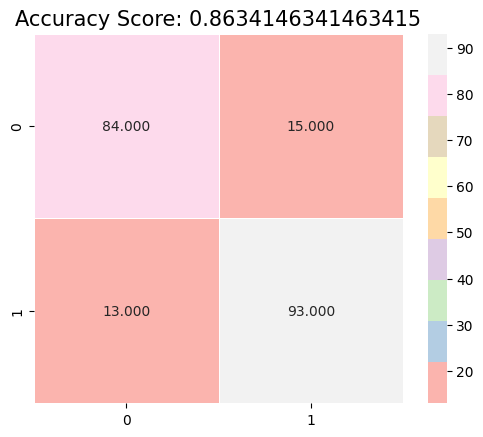

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix
knn_cm = confusion_matrix(y_test,pred)
plt.figure(figsize=(9,9))
plt.show()
sns.heatmap(knn_cm,annot=True, fmt='.3f', linewidths=.5, square=True,cmap="Pastel1")
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test,pred))
plt.title(all_sample_title,size=15)

# **Confusion Matrix**

Bir sınıflandırma algoritmasının doğruluğunu hesaplamak için makine öğreniminde sıklıkla kullanılır .

**Kullanım Amacı :** Yanlış sınıflandırmaları belirlemek için bir sınıflandırma modelinin öngörülen ve gerçek değerlerini özetler. Karışıklık matrisi, veri bilimcilerin modellerinde ince ayar yapmalarına ve performanslarını iyileştirmelerine yardımcı olur.

Bu yöntem ile Gerçek pozitifler (TP)
Yanlış pozitifler (FP)
Gerçek negatifler (TN)
Yanlış negatifler (FN) hesaplanır.


In [30]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

knnPredict = knn.predict(x_test)
 
confusion_matrix = confusion_matrix(y_test,knnPredict)

In [25]:
confusion_matrix

array([[86, 13],
       [13, 93]])

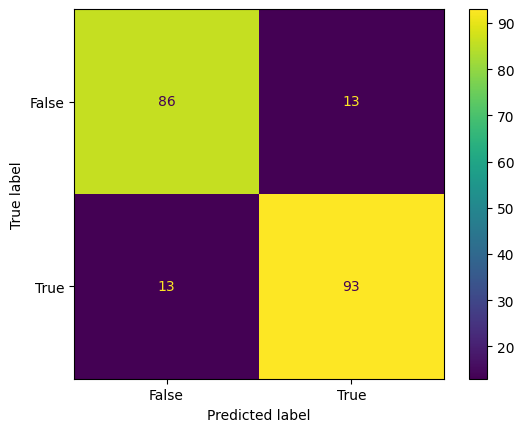

In [36]:
from sklearn import metrics

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()